# KMT2D / Kabuki Syndrome 1 due to KMT2D deficiency 


[Kabuki 1 Syndrome - OMIM:147920](https://omim.org/entry/147920) is caused by heterozygous mutation in the **KMT2D**  gene (previously known as MLL2) ([OMIM:602113](https://omim.org/entry/602113)).
KABUK1 is characterized by typical facial abnormalities, cleft or high arched palate, skeletal abnormalities, 
short stature, intellectual disability, congenital heart defects, recurrent 
infections (otitis media, pneumonia) in 50% of patients. Autoimmunity may be present


#### **Published Genotype Phenotype Correlations**

##### KMT2D & KDM6A

- [Banka et al (2012)](https://pubmed.ncbi.nlm.nih.gov/22126750/): 
    - analyzed the KMT2D gene in a cohort of 116 patients with Kabuki syndrome, including 18 patients previously reported by Hannibal et al. (2011), and identified KMT2D variants in 74 (63.8%).
    - KABUK1 patients were more likely to have feeding problems, kidney anomalies, early breast bud development, joint dislocations, and palatal malformations in comparison with KMT2D mutation-negative patients
    - **Systematic Kabuki syndrome facial morphology study suggested that nearly all patients with typical Kabuki syndrome facial features have pathogenic KMT2D mutations, although the disorder can be phenotypically variable.**

- [Miyake et al (2013)](https://pubmed.ncbi.nlm.nih.gov/23913813/)
    - screened 81 patients with Kabuki syndrome for mutations in the MLL2 and KDM6A genes and identified MLL2 mutations in 50 (61.7%) and KDM6A mutations in 5 (6.2%)
    - Patients with **KMT2D truncating mutations (70%) had facies that were more typical of those seen in the patients originally reported with Kabuki syndrome.** High-arched eyebrows, short fifth fingers, and infantile hypotonia were more commonly seen in patients with MLL2 mutations than in those with KDM6A mutations.
    - **Only half of the patients with KMT2D mutations had short stature and postnatal growth retardation**, compared to all of the patients with KDM6A mutations.


In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'KMT2D'
mane_tx_id = 'NM_003482.4'
mane_protein_id = 'NP_003473.3' 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize() 

Individuals Processed: 100%|██████████| 65/65 [00:00<00:00, 348.28 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #23
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)
     ·ontology_class of the time_of_death field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [4]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
36,Depressed nasal tip
30,Prominent fingertip pads
30,Global developmental delay
25,Long palpebral fissure
24,Macrotia
22,Highly arched eyebrow
21,Intellectual disability
18,Eversion of lateral third of lower eyelids
17,Cleft palate
16,Hearing impairment


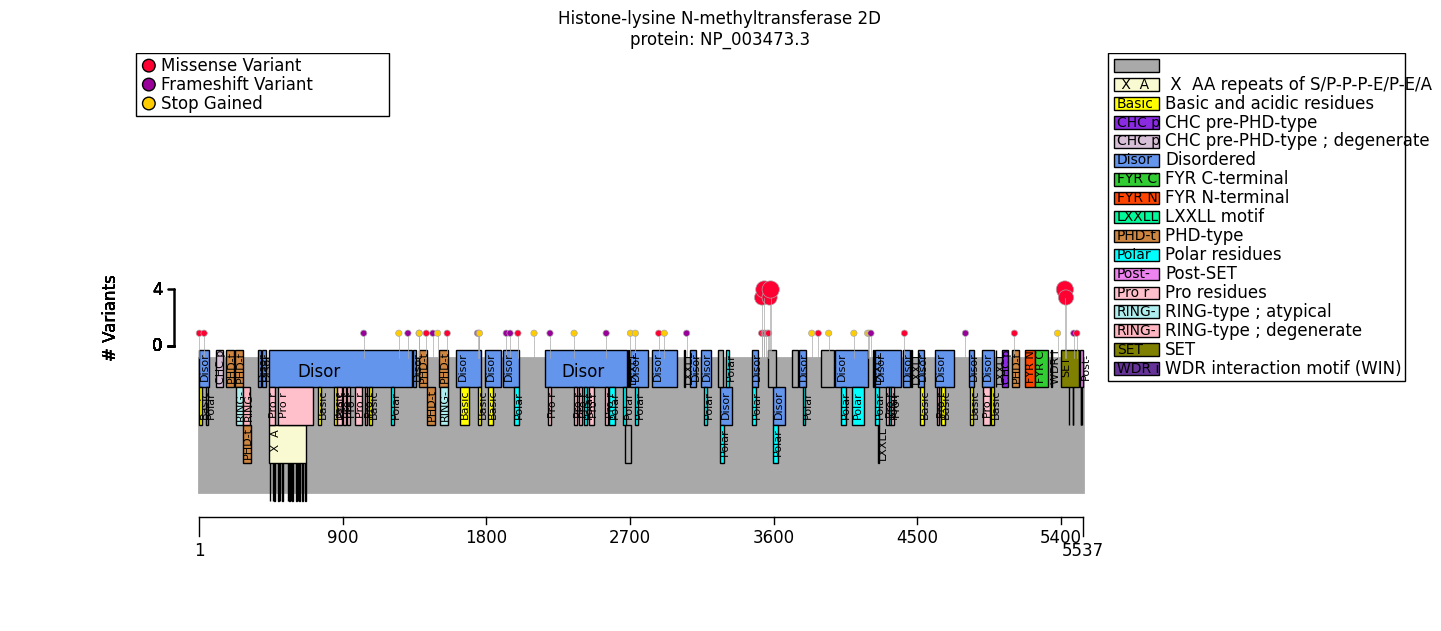

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

kmt2d_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
kmt2d_fig.tight_layout()

In [6]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(mane_tx_id)
viewer.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
4,12_49022655_49022655_C_T,c.16273G>A (p.Glu5425Lys),52,missense
4,12_49034182_49034182_A_G,c.10625T>C (p.Leu3542Pro),39,missense
3,12_49034082_49034082_C_G,c.10725G>C (p.Gln3575His),39,missense
3,12_49034225_49034225_G_C,c.10582C>G (p.Leu3528Val),39,missense
3,12_49033960_49033960_C_T,c.10745G>A (p.Arg3582Gln),40,missense
2,12_49022634_49022634_G_A,c.16294C>T (p.Arg5432Trp),52,missense
1,12_49054980_49054980_G_C,c.96C>G (p.Asp32Glu),3,missense
1,12_49046358_49046358_G_T,c.4485C>A (p.Tyr1495Ter),17,stop gained
1,12_49031446_49031446_C_T,c.13259G>A (p.Arg4420Gln),40,missense
1,12_49049198_49049199_TG_T,c.3926del (p.Pro1309GlnfsTer21),13,frameshift


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.view import MtcStatsViewer

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
missense_clf = monoallelic_classifier(a_predicate=missense,
                                      b_predicate=~missense,
                                      a_label="missense",
                                      b_label="other")

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,42
HMF03,Skipping term because of a child term with the same individual counts,5
HMF08,Skipping general term,108
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,279


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,missense,other,Corrected p values,p values
Hearing impairment [HP:0000365],14/19 (74%),8/21 (38%),0.956991,0.030871
Highly arched eyebrow [HP:0002553],8/9 (89%),14/21 (67%),1.000000,0.374190
Recurrent otitis media [HP:0000403],8/15 (53%),6/17 (35%),1.000000,0.476451
Long palpebral fissure [HP:0000637],8/8 (100%),17/21 (81%),1.000000,0.552019
Depressed nasal tip [HP:0000437],16/20 (80%),20/27 (74%),1.000000,0.736504
Abnormality of the palpebral fissures [HP:0008050],11/11 (100%),18/18 (100%),1.000000,1.000000
Prominent digit pad [HP:0011298],12/12 (100%),18/18 (100%),1.000000,1.000000
Regional abnormality of skin [HP:0011356],12/12 (100%),18/18 (100%),1.000000,1.000000
Abnormal fingertip morphology [HP:0001211],12/12 (100%),18/18 (100%),1.000000,1.000000
Abnormal hand morphology [HP:0005922],12/12 (100%),18/18 (100%),1.000000,1.000000


### Correlation of Region 3300 - 3700


In [10]:
from gpsea.model.genome import Region
from gpsea.analysis.predicate import protein_region

nterm_region = Region(start=3300, end=3700)
is_n_term = protein_region(region=nterm_region, tx_id=mane_tx_id)

nterm_clf = monoallelic_classifier(a_predicate=is_n_term,
                                     b_predicate=~is_n_term,
                                     a_label="n_term",
                                     b_label="other")
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group,n_term,other,Corrected p values,p values
Hearing impairment [HP:0000365],8/8 (100%),14/32 (44%),0.146537,0.004727
Macrotia [HP:0000400],0/2 (0%),24/28 (86%),0.363244,0.034483
Depressed nasal tip [HP:0000437],1/4 (25%),35/43 (81%),0.363244,0.035153
Recurrent otitis media [HP:0000403],0/3 (0%),14/29 (48%),1.000000,0.237903
Global developmental delay [HP:0001263],4/5 (80%),26/27 (96%),1.000000,0.292339
Scoliosis [HP:0002650],2/4 (50%),8/32 (25%),1.000000,0.304813
Recurrent infections [HP:0002719],3/6 (50%),27/35 (77%),1.000000,0.316153
Short stature [HP:0004322],3/5 (60%),19/26 (73%),1.000000,0.612532
Highly arched eyebrow [HP:0002553],1/1 (100%),21/29 (72%),1.000000,1.000000
Abnormal hand morphology [HP:0005922],1/1 (100%),29/29 (100%),1.000000,1.000000


### Correlation Female vs Male

In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Macrotia [HP:0000400],11/17 (65%),13/13 (100%),0.73572,0.023733
Highly arched eyebrow [HP:0002553],10/16 (62%),12/14 (86%),1.00000,0.225534
Prominent fingertip pads [HP:0001212],17/23 (74%),13/15 (87%),1.00000,0.439767
Recurrent infections [HP:0002719],16/20 (80%),14/21 (67%),1.00000,0.484078
Depressed nasal tip [HP:0000437],21/26 (81%),15/21 (71%),1.00000,0.504977
Global developmental delay [HP:0001263],18/20 (90%),12/12 (100%),1.00000,0.516129
Recurrent otitis media [HP:0000403],8/16 (50%),6/16 (38%),1.00000,0.722393
Hearing impairment [HP:0000365],14/27 (52%),8/13 (62%),1.00000,0.736897
Intellectual disability [HP:0001249],12/13 (92%),13/14 (93%),1.00000,1.000000
Long palpebral fissure [HP:0000637],13/15 (87%),12/14 (86%),1.00000,1.000000


### Correlation specific Variant 

In [12]:
from gpsea.analysis.predicate import variant_key
l3542p = variant_key("12_49034182_49034182_A_G") #	c.10625T>C (p.Leu3542Pro)

l3542p_clf = monoallelic_classifier(
    a_predicate=l3542p,
    b_predicate= ~l3542p,
    a_label='p.Leu3542Pro',
    b_label='Other variant')

l354p_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=l3542p_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=l354p_result)

Allele group,p.Leu3542Pro,Other variant,Corrected p values,p values
Recurrent otitis media [HP:0000403],0/1 (0%),14/31 (45%),1.0,1.0
Neurodevelopmental delay [HP:0012758],1/1 (100%),38/38 (100%),1.0,1.0
Neurodevelopmental abnormality [HP:0012759],1/1 (100%),43/43 (100%),1.0,1.0
Unusual infection [HP:0032101],2/2 (100%),28/28 (100%),1.0,1.0
Recurrent infections [HP:0002719],2/3 (67%),28/38 (74%),1.0,1.0


### Correlation for specific variant: 12_49022655_49022655_C_T

In [13]:
q5425k = variant_key("12_49022655_49022655_C_T") # c.16273G>A (p.Glu5425Lys)

q5425k_clf = monoallelic_classifier(
    a_predicate=q5425k,
    b_predicate= ~q5425k,
    a_label='p.Glu5425Lys',
    b_label="other"
)

q5425k_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=q5425k_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=q5425k_result)

Allele group,p.Glu5425Lys,other,Corrected p values,p values
Recurrent otitis media [HP:0000403],4/4 (100%),10/28 (36%),0.723749,0.027836
Short stature [HP:0004322],4/4 (100%),18/27 (67%),1.000000,0.295217
Scoliosis [HP:0002650],2/4 (50%),8/32 (25%),1.000000,0.304813
Recurrent infections [HP:0002719],4/4 (100%),26/37 (70%),1.000000,0.559001
Prominent fingertip pads [HP:0001212],4/4 (100%),26/34 (76%),1.000000,0.559981
Hearing impairment [HP:0000365],3/4 (75%),19/36 (53%),1.000000,0.613273
Abnormal axial skeleton morphology [HP:0009121],2/2 (100%),26/26 (100%),1.000000,1.000000
Abnormal nasal tip morphology [HP:0000436],3/3 (100%),33/33 (100%),1.000000,1.000000
Abnormal external nose morphology [HP:0010938],3/3 (100%),40/40 (100%),1.000000,1.000000
Abnormal nasal morphology [HP:0005105],3/3 (100%),47/47 (100%),1.000000,1.000000


### Summary

- **M vs F**: no significant correlations found
- **Mutation Types**: no significant correlation found, only a tendency for Missense vs other variants, just a tendency for various features
- **Region Correlation** region 3300-3700 here we actually found a significant correltation for sensorineural hearing impairment [HP:0000407]: corr.p.value: 0.0002 , and a tendency for hearing impairment [HP:0000365]: corr.p.value 0.066
- **specific Variants**: no significant correlation found for the two most frequent variants (12_49022655_49022655_C_T and 12_49034182_49034182_A_G)

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
  GPAnalysisResultSummary.from_multi( result=mf_result,  ),
  GPAnalysisResultSummary.from_multi( result=missense_result,  ),
  GPAnalysisResultSummary.from_multi( result=nterm_result,  ),
  GPAnalysisResultSummary.from_multi( result=q5425k_result,  ),
  GPAnalysisResultSummary.from_multi( result=l354p_result,  ),
)


caption = """."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,31,0
Genotype (A),Genotype (B),Tests performed,Significant tests
missense,other,31,0
Genotype (A),Genotype (B),Tests performed,Significant tests
n_term,other,31,0
Genotype (A),Genotype (B),Tests performed,Significant tests
p.Glu5425Lys,other,26,0
Genotype (A),Genotype (B),Tests performed,Significant tests
p.Leu3542Pro,Other variant,5,0


In [16]:
summarizer.process_latex(report=report, protein_fig=kmt2d_fig)

Figure saved to ../../supplement/img/KMT2D_protein_diagram-draft.pdf
Output to ../../supplement/tex/KMT2D_summary_draft.tex
